# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('03-x_train-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('03-x_test-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('03-y_train-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('03-y_test-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **MODELO DE MARCHINE LEARNING**

In [3]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [4]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train, y_t_Categorical , epochs=1500)
y_predict = clf.predict(x_test)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#4000 63
#10000 63

Epoch 1/1500
57/57 [==============================] - 1s 3ms/step - loss: 38.0051 - accuracy: 0.4046
Epoch 2/1500
57/57 [==============================] - 0s 3ms/step - loss: 7.1173 - accuracy: 0.4496
Epoch 3/1500
57/57 [==============================] - 0s 3ms/step - loss: 6.6285 - accuracy: 0.4216
Epoch 4/1500
57/57 [==============================] - 0s 3ms/step - loss: 4.4023 - accuracy: 0.4786
Epoch 5/1500
57/57 [==============================] - 0s 3ms/step - loss: 4.7852 - accuracy: 0.4583
Epoch 6/1500
57/57 [==============================] - 0s 3ms/step - loss: 3.7620 - accuracy: 0.4890
Epoch 7/1500
57/57 [==============================] - 0s 3ms/step - loss: 3.8505 - accuracy: 0.4764
Epoch 8/1500
57/57 [==============================] - 0s 3ms/step - loss: 4.8079 - accuracy: 0.4644
Epoch 9/1500
57/57 [==============================] - 0s 3ms/step - loss: 4.6667 - accuracy: 0.4868
Epoch 10/1500
57/57 [==============================] - 0s 3ms/step - loss: 3.7715 - accuracy: 0.473

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 2, 2, 0, 3, 2, 2, 3, 0, 2, 3,
       2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 3, 0, 3, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 3, 3, 0, 2, 0, 3, 0, 3, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 3, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 3,
       2, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 2,
       2, 3, 2, 2, 3, 2, 0, 2, 3, 2, 1, 1, 3, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 3, 0, 0, 2, 2, 3, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 0, 0, 3, 2, 2, 0, 3, 3, 3, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 0,
       0, 0, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 3, 1, 0, 2, 3, 2, 2, 2, 0, 2, 0, 2,
       3, 2, 2, 2, 2, 3, 0, 2, 3, 2, 0, 2, 3, 3, 2, 2, 0, 1, 3, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 3, 2, 3, 2,

# **EVALUACION**

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        53
           1       0.24      0.14      0.18        56
           2       0.61      0.72      0.66       238
           3       0.61      0.42      0.50       109

    accuracy                           0.55       456
   macro avg       0.47      0.45      0.45       456
weighted avg       0.54      0.55      0.54       456



In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        53
           1       0.24      0.14      0.18        56
           2       0.61      0.72      0.66       238
           3       0.61      0.42      0.50       109

    accuracy                           0.55       456
   macro avg       0.47      0.45      0.45       456
weighted avg       0.54      0.55      0.54       456

Matriz de confusión, sin normalización
[[ 28   5  19   1]
 [ 10   8  33   5]
 [ 26  17 171  24]
 [  2   3  58  46]]


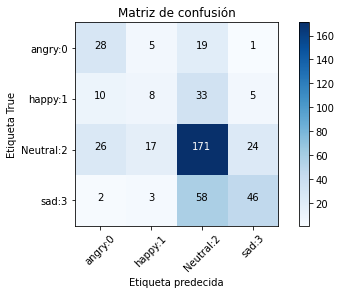

In [7]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')